Name: Ramnarain Nair, Student Number: 100468356, Date: 11/11/2021

**Importing all the relevant libraries**

In [116]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import math

**Loading and displaying the data. The dataset is already clean so there is no need to clean the data.**

In [117]:
data = pd.read_csv("iris.csv", decimal = ".")
display(data)

,sepal_length,sepal_width,petal_length,petal_width,class_label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Looking at the data, we see that we have different measurements (sepal length, sepal width, petal length and petal width) for each type of iris flower (setosa, virginica and versicolor). The goal is to use these measurements to try and predict the type of flower.

As we are looking at a classification problem, it would interesting to group the data by each type of iris flower and provide some decriptive statistics

In [118]:
data.groupby('class_label').describe()

sepal_length                                              \
                   count   mean       std  min    25%  50%  75%  max   
class_label                                                            
setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

            sepal_width         ... petal_length      petal_width         \
                  count   mean  ...          75%  max       count   mean   
class_label                     ...                                        
setosa             50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor         50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica          50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                
                  std  min  25%  50%  75%  max  
class_label                                     
setosa       0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor   0.197753  1.0  1.2  1.3  1.5  1.8  
virginica    0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

Text(0.5, 1.0, 'Boxplot of sepal length for each flower')

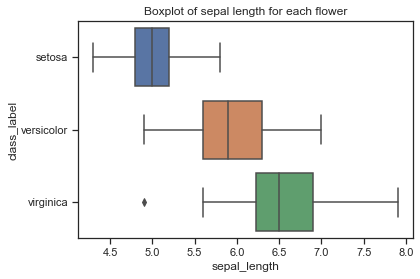

In [119]:
sns.set(style="ticks", color_codes = True)
sns.boxplot(x="sepal_length", y="class_label", data = data).set_title('Boxplot of sepal length for each flower')

Text(0.5, 1.0, 'Boxplot of sepal width for each flower')

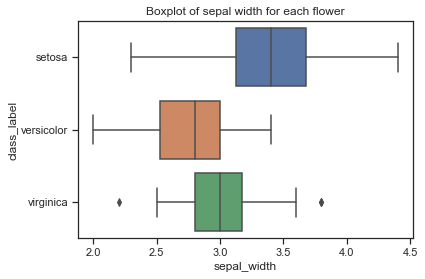

In [120]:
sns.boxplot(x="sepal_width", y="class_label", data = data).set_title('Boxplot of sepal width for each flower')

Text(0.5, 1.0, 'Boxplot of petal length for each flower')

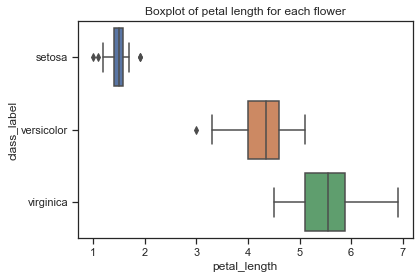

In [121]:
sns.boxplot(x="petal_length", y="class_label", data = data).set_title('Boxplot of petal length for each flower')

Text(0.5, 1.0, 'Boxplot of petal width for each flower')

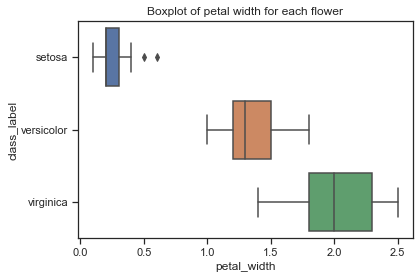

In [122]:
sns.boxplot(x="petal_width", y="class_label", data = data).set_title('Boxplot of petal width for each flower')

The boxplots give us an idea of the difference between setosa and the other two flowers in terms of the petals. The boxplot of setosa for petal length and petal width never overlap with the versicolor and virginica. This is an indication that we can discriminate setosa from the other two flowers based on the its range of values for petal lenght and petal width.

Looking at the descriptive statistics above, something that stands out in particular is that the setosa iris flower has the highest mean for sepal width but has the smallest mean for the the other measurements. This could be useful because this piece of information could help us classify the the setosa iris flower from the other two other type of iris flowers. However, it is essential that we keep in mind that this value is the mean and could be swayed by the maximum and minimum values, which might not lead to the most accurate classification of setosa flowers.

Now, another way that could be used to classify the type of iris flower could be by looking at the maximum and minimum values for each measurement. For example, the petal width for setosa flower has a minimum and maximum value of 0.1 and 0.6 respectively, which does not overlap with the range for versicolor and virginica. Hence, for this dataset if the petal width falls in between 0.1 and 0.6, the flower is a setosa iris flower. It is easy to classify setosa flowers from the other two flowers however, the range of values for the petal width of versicolor and virginica overlap with one another, making it more difficult to classify them. In this case, it would be useful to look at other measurements such as, sepal length, sepal width and petal length. This is where classification methods prove to be very useful, which can be used to identify attributes that help discriminate the type of iris flowers.

To better visualize the relationship between each of the measurements for each flower, a scatter plot will be useful

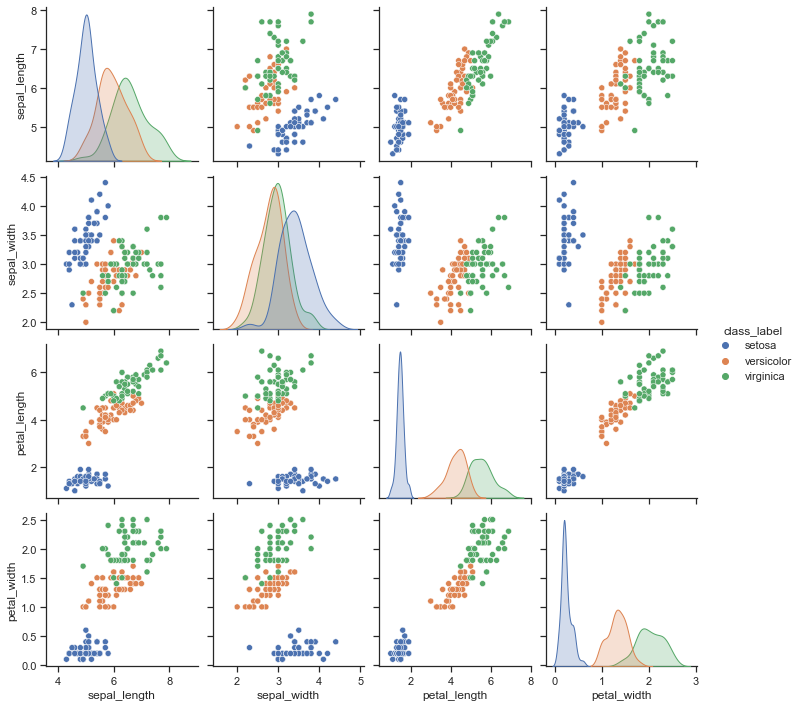

In [123]:
sns.pairplot(data, hue = 'class_label')

A general observation in the scatter plot is that the setosa flowers are quite different from virginica and versicolor as mentioned before (it can easily be discriminated from the other two). Whereas, with virginica and versicolor there are still some overlaps in the distributions above however, we can still discriminate them in most cases (It is important to note that in a machine learning model we cannot achieve 100% accuracy and most of the time we are looking for a model that is good enough).

A better or more "official" method of classifying the class of iris flowers would be to use classification methods such as, decision trees, neural networks, random forests and etc. It could be that the classification models will be successful in predicting the flower setosa. However, for versicolor and virginica, the models will predict most of their instances and not all because of the overlaps that you can see in the distributions above. These classification models will be implemented in the next steps of the analysis.

**Classification Methods: Decision Trees & Logistic Regression**
- The idea would be to have a training-test split, where we train the model on the train set and try run it on
the test set.

Why a decision tree and logistic regression model?

- Something important to keep in mind is that we are dealing with a relatively small dataset and we should use simple models. The problem that may arise when using complex models such as, neural networks and random forests on smaller datasets is that they may ovefit the data. The goal is to generalize patterns in the data that we train so that we can predict the outcomes of new data. If the model overfits data, it will result in inaccurate predictions. Hence why the chosen classification methods is a decision tree and logistic regression model.


- The logistic regression model tends to overfit in higher dimensional data (more features than observations) however, in the case of the iris dataset the number of observations is greater than the number of features (150 versus 4). It is less likley to overfit in smaller dimensional datasets.


- The decision tree model allows for better interpretability becasue it allows us to trace back the decision process made by the model. In the case of the iris dataset, we can easily trace which features the model used to try and discriminate the iris flowers.

**Assigning X and y variables**

In [124]:
y = np.array(data['class_label']) # gets just the column class_label
X = np.array(data.iloc[:, 0:-1]) # gets all the columns except the last column (all the features of an iris flower)

**Importing and Instantiating the relevant classifiers**

In [125]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth = 5) 

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

**Using K-fold Cross-Validation with the Chosen Models**

- The idea behind using the K-fold method is to try and ensure that all the data/observations can appear in the test set. This way we can reduce the bias and possibly obtain a model that can better generalize unseen data. It allows us to have a more accurate representation of a models performance.


- Given that this is a relatively small dataset, using too many folds might result in overfitting, hence, the chosen number of folds is 3 --> where there will be 50 data points in each fold.

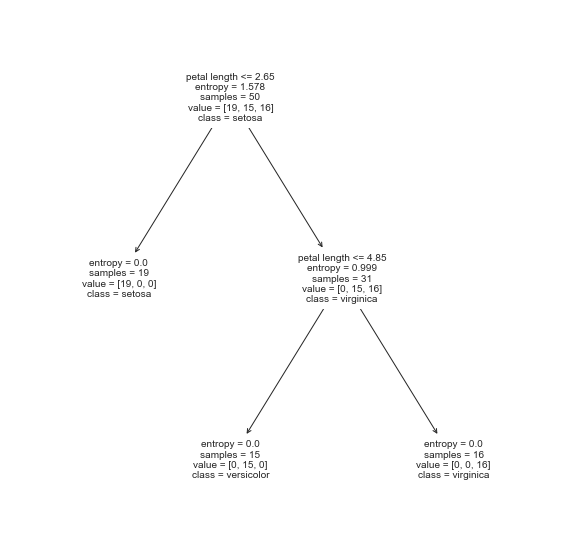

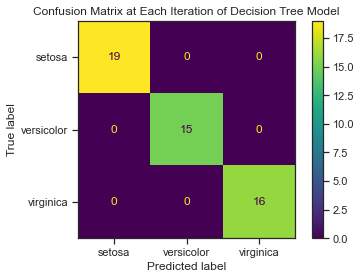

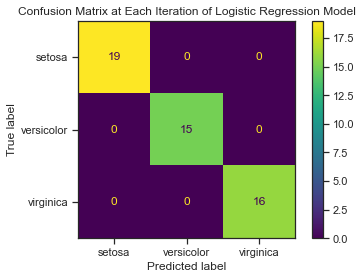

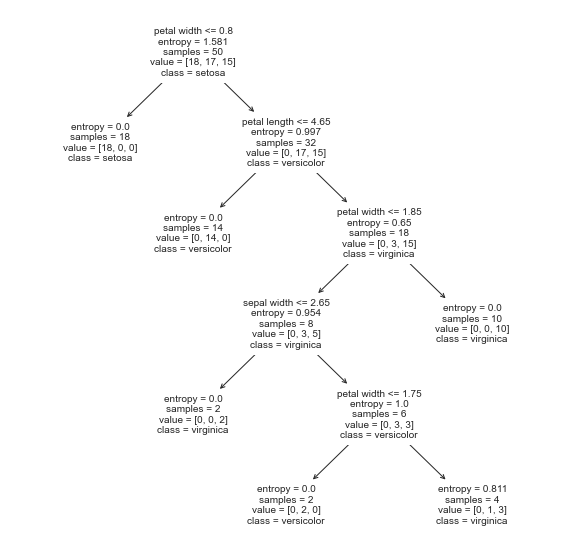

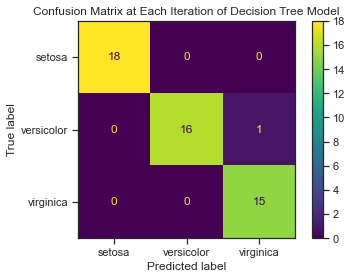

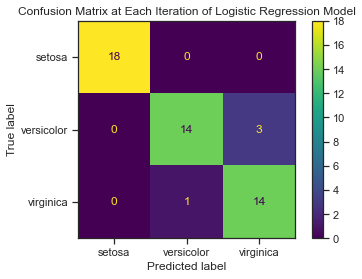

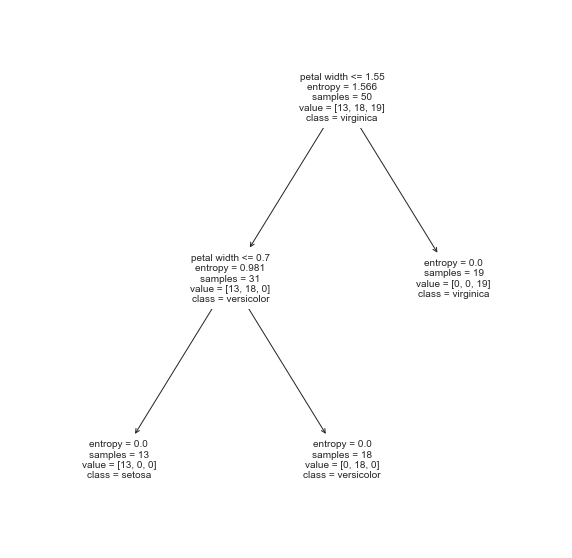

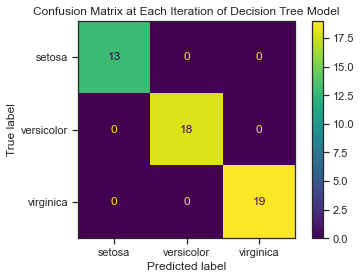

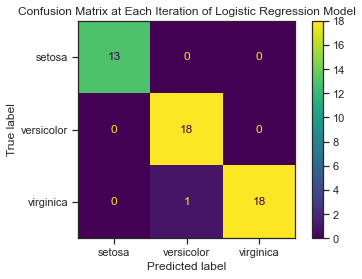

In [142]:
# Importing the Kfold model and relevant scoring measures such as, accuracy , precision, recall and the f1 score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree



# Creating the 3 folds
kf = KFold(n_splits=3, shuffle = True, random_state = 42)

# Arrays to store the scores in each iteration of the for loop for the decision tree model
scoreA_dt = []
scoreP_dt = []
scoreR_dt = []
scoreF1_dt = []

# Arrays to store the scores in each iteration of the for loop for the logistic regression model
scoreA_lr = []
scoreP_lr = []
scoreR_lr = []
scoreF1_lr = []

conf_matrix_list_of_arrays = []

for train_index, test_index in kf.split(X):
    
    # Split the data train and test data for each iteration of the for loop
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the training data to the model for each iteration of the for loop
    dt.fit(X_train, y_train)
    lr.fit(X_train, y_train)
    
    #---------------------------------------------------------------------------------------#
    
    # Predicting the outcome of the classification for each iteration of the for loop
    y_pred_dt = dt.predict(X_test)
    y_pred_lr = lr.predict(X_test)
    
    #---------------------------------------------------------------------------------------#
    
    # Prints the decision tree at each iteration
    fig, ax = plt.subplots(figsize=(10, 10))
    tree.plot_tree(dt.fit(X_test, y_test), fontsize=10, 
                   feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
                      class_names=['setosa', 'versicolor', 'virginica'])
    plt.show()
    
    #---------------------------------------------------------------------------------------#
    
    # Decision Tree Scores on test
    acc_score = accuracy_score(y_test, y_pred_dt)
    scoreA_dt.append(acc_score)
    
    pre_score = precision_score(y_test, y_pred_dt, average = 'macro')
    scoreP_dt.append(pre_score)
    
    rec_score = recall_score(y_test, y_pred_dt, average='macro')
    scoreR_dt.append(rec_score)
    
    F1_score = f1_score(y_test, y_pred_dt, average='macro')
    scoreF1_dt.append(F1_score) 
    

    # Plots the confusion matrix at each iteration for the decision tree model
    plot_confusion_matrix(dt, X_test, y_test)
    plt.title("Confusion Matrix at Each Iteration of Decision Tree Model")
    
    
    #---------------------------------------------------------------------------------------#

    # Logistic Regression Scores on test
    acc_score1 = accuracy_score(y_test, y_pred_lr)
    scoreA_lr.append(acc_score1)
    
    pre_score1 = precision_score(y_test, y_pred_lr, average='macro')
    scoreP_lr.append(pre_score1)
    
    rec_score1 = recall_score(y_test, y_pred_lr, average='macro')
    scoreR_lr.append(rec_score1)
    
    F1_score1 = f1_score(y_test, y_pred_lr, average='macro')
    scoreF1_lr.append(F1_score1)
    
    # Plots the confusion matrix at each iteration for the logistic regression model
    plot_confusion_matrix(lr, X_test, y_test)
    plt.title("Confusion Matrix at Each Iteration of Logistic Regression Model")

**Confusion Matrix & Decision Tree Analysis**

- When observing the confusion matrices in both models, one thing that can stands out is that the models correctly predict that the flower is a setosa flower 100% of the time. This result is consistent with the claim made earlier that the models would be able to discriminate setosa flowers from the other two flowers all the time because of their stark differences. However, where the models go wrong is when they have to discriminate between the virginica and versicolor flowers, which have some similarities. As mentioned before, due to the overlap in their distributions the models struggle to discriminate some instances of the virginica and versicolor flowers. For example, in the second interation of the k-fold cross validation, the confusion matrix tells us that both models predicted that a flower was a versicolor when it was really a virginica flower (1/15 = 7% is incorrectly classified). And both models predicted that 3 flowers were a virginica when it was really versicolor (3/17 = 17.6% is incorrectly classified). This is an example of where the model struggles to differentiate between virginica and versicolor.


- Now, when we visualise the decision tree at each iteration, it shows us how the model classifies each flower at each fold on the test set. As mentioned before, decision trees allow better interpretability and as the name suggests we can trace back all the decisions made by the model. As an example, look at the decision tree produced after the first iteration. In the beginning we have 50 observations that have been split into the type of flower. In the first node, the feature that is used to discriminate is petal length <= 2.65. The model then checks which flowers satisfy this condition and those 19 flowers move on the another node where they are classified as setosa flowers. The remaining 31 flowers move to another node where they are discriminated by a petal length <= 4.85. The 16 flowers that satisfy this condition move to a seperate node and are classified as virginica flowers. The remaining, 15 flowers have a petal lenght > 4.85 and are moved to another node, where they are classified as versicolor flowers. This is just an example of how the decision tree makes decisions using features to classify the iris flowers.

**Looking at the scores after each iteration or for each fold**

In [127]:
print("Over the test set:")
print("Decision Tree Model Accuracy Score for each Fold: ", scoreA_dt)
print("Decision Tree Model Precision Score for each Fold: ", scoreP_dt)
print("Decision Tree Model Recall Score for each Fold: ", scoreR_dt)
print("Decision Tree Model F1 Score for each Fold: ", scoreF1_dt)

print()


print("Over the test set:")
print("Logistic Regression Model Accuracy Score for each Fold: ", scoreA_lr)
print("Logistic Regression Precision Score for each Fold: ", scoreP_lr)
print("Logistic Regression Recall Score for each Fold: ", scoreR_lr)
print("Logistic Regression F1 Score for each Fold: ", scoreF1_lr)

Over the test set:
Decision Tree Model Accuracy Score for each Fold:  [0.96, 0.92, 0.92]
Decision Tree Model Precision Score for each Fold:  [0.9569444444444445, 0.918954248366013, 0.9278752436647174]
Decision Tree Model Recall Score for each Fold:  [0.9569444444444445, 0.918954248366013, 0.9278752436647174]
Decision Tree Model F1 Score for each Fold:  [0.9569444444444445, 0.9166666666666666, 0.9278752436647174]

Over the test set:
Logistic Regression Model Accuracy Score for each Fold:  [1.0, 0.92, 0.98]
Logistic Regression Precision Score for each Fold:  [1.0, 0.918954248366013, 0.9824561403508771]
Logistic Regression Recall Score for each Fold:  [1.0, 0.918954248366013, 0.9824561403508771]
Logistic Regression F1 Score for each Fold:  [1.0, 0.9166666666666666, 0.981981981981982]


Looking at the results above, we can see that regardless of the type score method for each model, they are all equal in each fold. In the decision tree model, each scoring method has 0.96, 0.92 and 0.92 for each fold respectively. In the logistic regression model, each scoring method has 1, 0.92 and 0.98 for each fold respectively. It seems that the decision tree and logistic regression model are performing at the same level in the second iteration. Looking at these values for each model, it is clear which one will have an average that is higher for each scoring method. This is done in the next step:

**Averaging the scores for each model**

In [128]:
print("Decision Tree Model Accuracy Score for each Fold: ", np.mean(scoreA_dt))
print("Decision Tree Model Precision Score for each Fold: ", np.mean(scoreP_dt))
print("Decision Tree Model Recall Score for each Fold: ", np.mean(scoreR_dt))
print("Decision Tree Model F1 Score for each Fold: ", np.mean(scoreF1_dt))

print()

print("Logistic Regression Model Accuracy Score for each Fold: ", np.mean(scoreA_lr))
print("Logistic Regression Precision Score for each Fold: ", np.mean(scoreP_lr))
print("Logistic Regression Recall Score for each Fold: ", np.mean(scoreR_lr))
print("Logistic Regression F1 Score for each Fold: ", np.mean(scoreF1_lr))

Decision Tree Model Accuracy Score for each Fold:  0.9333333333333332
Decision Tree Model Precision Score for each Fold:  0.9345913121583916
Decision Tree Model Recall Score for each Fold:  0.9345913121583916
Decision Tree Model F1 Score for each Fold:  0.9338287849252761

Logistic Regression Model Accuracy Score for each Fold:  0.9666666666666667
Logistic Regression Precision Score for each Fold:  0.9671367962389633
Logistic Regression Recall Score for each Fold:  0.9671367962389633
Logistic Regression F1 Score for each Fold:  0.9662162162162162


Accuracy is not a good measure of model performance because in imabalanced datasets it would still produce a high measure of accuracy. This is why we look into measures such as, precision, recall and the f1 score, which are better measures of determining a models performance. However, in the results that we found, it does not make a difference because regardless of the score the result is the around same. One thing that might be of importance to note is that the accuracy score is almost equal to the precision, recall and f1 score, which is an indication that the data is quite balanced in the k fold cross-validation.

For the decision tree model, the precision score is 93% of the is positively classified out of the total number of predicted positive classifications. The recall score suggests that 93% of the postive cases were correctly classified out of the total number of postive cases. The F1 score is also at 93%, which is high, indicating that the model is performing very well.

For the logistic regression model, the precision score is 97% of the is positively classified out of the total number of predicted positive classifications. The recall score suggests that 97% of the postive cases were correctly classified out of the total number of postive cases. The F1 score is also at 97%, which is high, indicating that the model is performaing very well and having a slight edge over the decision tree model. It is important to note that this does not mean the decision tree model is bad, it is still very good but it seems from the average values that the logistic regression model is slightly better. We can verify if it is actually better by carrying out a paired sample t-test. This is in the next step:

**Paired sample t-test of the scores --> Given that they are the same for each model, one test is sufficient**

In [129]:
from scipy import stats

stats.ttest_rel(scoreA_dt,scoreA_lr)

Ttest_relResult(statistic=-1.8898223650461368, pvalue=0.1993592309745642)

Based on the paired sample t-test, we get a p-value of 0.19 > 0.05 and therefore, we fail the reject the null hypothesis at a 5% siginificance level. Hence, the meean difference between the scores is 0. So, from a statistical point of view, the scores for each model are not significantly different from one another. Thus, there is not a better performing model out of the two, both of them can be considered to be good, high performing models that have scores larger than 90%. 